## Introduction
This notebook tries to take in a sample dataset in notebook environment and run some tests to demo the verification of differential privacy algorithms. 

### Load the DP Verification Modules

In [1]:
import pandas as pd
import DPVerification as dp
import Aggregation as agg

### Load Data

In [2]:
dv = dp.DPVerification()
ag = agg.Aggregation(t=1)

Loaded 10000 records


### Test Parameters

In [3]:
repeatcount = 10000 # Repeating the aggregation these many times
# Using the auto method of np.histogram to decide bin size
# Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance.
numbins = 0

## Exact Counts

Length of D1:  10000  Length of D2:  9999
Mean fD1:  10000  Stdev fD1:  0.0  Mean fD2:  9999  Stdev fD2:  0.0

KS 2-sample Test Result:  Ks_2sampResult(statistic=1.0, pvalue=0.0) 

Wasserstein Distance Test:  0.0 

DP Predicate Test: False 



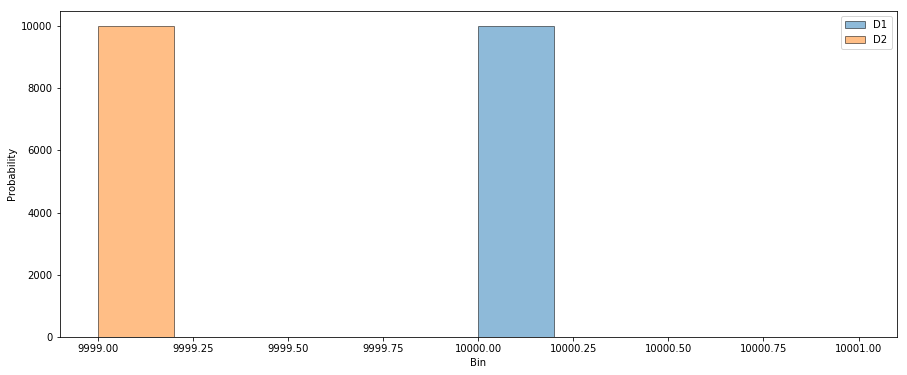

In [4]:
dp_exact, ks_exact, ws_exact = dv.aggtest(ag.exact_count, 'UserId', repeatcount, binsize = "unity", bound = False, exact = True)

If we do exact count repeatedly on a set D1 of 10K records and set D1 of 9,999 records (neighboring datasets), we shall get two histograms that are easily distinguishable from each other. So we can make out the extra record is in D1 vs D2. This is a trivial case of re-identification as it leads us to infer net new information about an individual record being part of D1 vs D2. 

#### Exact count fails the DP test

## Buggy Implementation of DP

Length of D1:  10000  Length of D2:  9999
Mean fD1:  10004.967750403664  Stdev fD1:  2.891237927091873  Mean fD2:  10003.996722922044  Stdev fD2:  2.875257858728964

KS 2-sample Test Result:  Ks_2sampResult(statistic=0.10459999999999992, pvalue=4.175102550739557e-48) 

Wasserstein Distance Test:  0.019360000000000002 

DP Predicate Test: False 



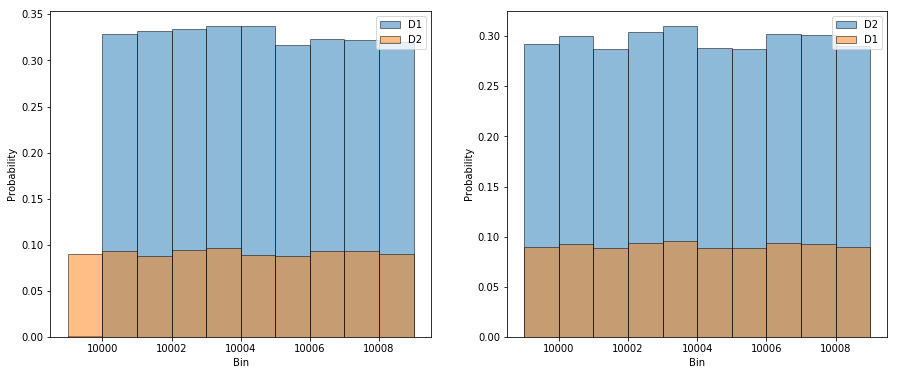

In [5]:
dp_buggy, ks_buggy, ws_buggy = dv.aggtest(ag.buggy_count, 'UserId', repeatcount, binsize = "unity", bound = True)

#### We can see that the histograms are not bounded. The test is able to uncover this implementation of DP noisy count is incorrect which is what we'd expect this test to uncover. 

## [DP Implementation as per MSR equations](https://www.yammer.com/microsoft.com/#/files/182490914816)

### COUNT Test

Length of D1:  10000  Length of D2:  9999
Mean fD1:  9999.896594800253  Stdev fD1:  5.400244176245732  Mean fD2:  9998.949408799317  Stdev fD2:  5.331361579318794

KS 2-sample Test Result:  Ks_2sampResult(statistic=0.07390000000000008, pvalue=3.174548694732298e-24) 

Wasserstein Distance Test:  0.001165674707005585 

DP Predicate Test: True 



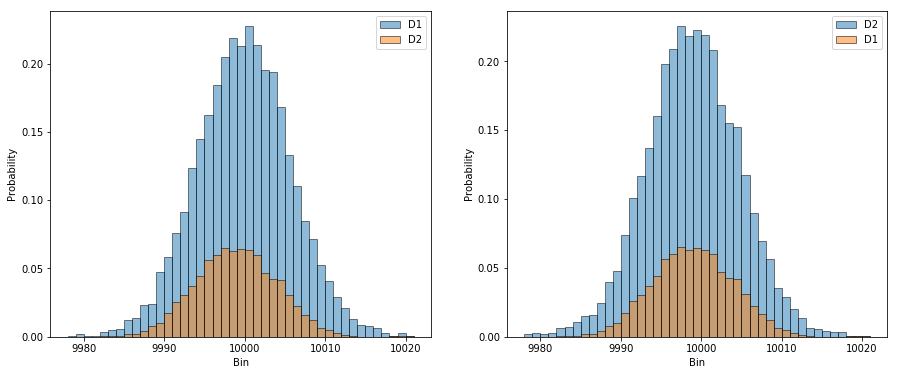

In [6]:
dp_count, ks_count, ws_count = dv.aggtest(ag.dp_count, 'UserId', repeatcount, binsize="unity", debug = False)

#### Noisy COUNT aggregation passes the DP Predicate test

### SUM Test

Length of D1:  10000  Length of D2:  9999
Mean fD1:  19876.663182078424  Stdev fD1:  63.57239713786615  Mean fD2:  19875.270303101748  Stdev fD2:  64.30344694293686

KS 2-sample Test Result:  Ks_2sampResult(statistic=0.014900000000000024, pvalue=0.21527374193503254) 

Wasserstein Distance Test:  8.082168621340842e-05 

DP Predicate Test: True 



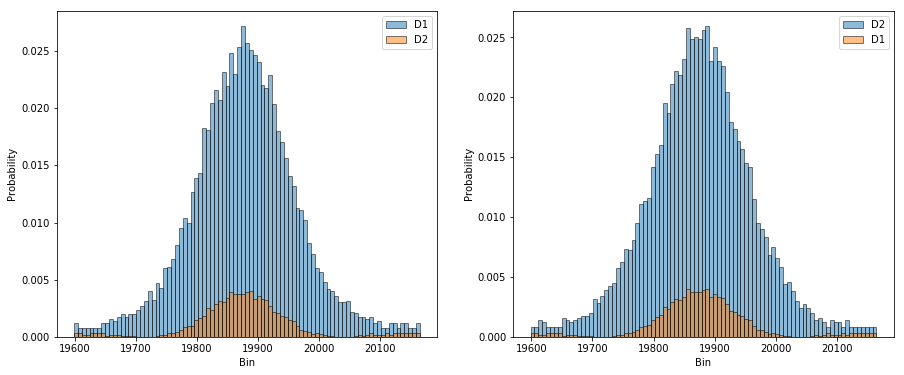

In [7]:
dp_sum, ks_sum, ws_sum = dv.aggtest(ag.dp_sum, 'Usage', repeatcount, binsize="auto")

#### Noisy SUM aggregation passes the DP predicate test

### Mean Test

Length of D1:  10000  Length of D2:  9999
Mean fD1:  1.9876636265683394  Stdev fD1:  0.006520874642442035  Mean fD2:  1.9872102890029528  Stdev fD2:  0.006452524276889024

KS 2-sample Test Result:  Ks_2sampResult(statistic=0.03270000000000006, pvalue=4.37706169191868e-05) 

Wasserstein Distance Test:  1.0879407703325743 

DP Predicate Test: True 



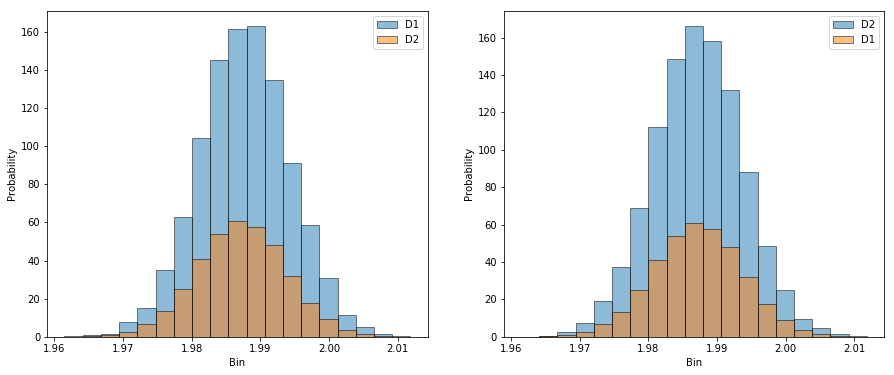

In [8]:
dp_mean, ks_mean, ws_mean = dv.aggtest(ag.dp_mean, 'Usage', repeatcount, numbins=20, debug=False)

#### Noisy mean passes the DP Predicate test

### Variance Test

Length of D1:  10000  Length of D2:  9999
Mean fD1:  1.9218929089727805  Stdev fD1:  0.09343698293973973  Mean fD2:  1.923278714473025  Stdev fD2:  0.09223470961719851

KS 2-sample Test Result:  Ks_2sampResult(statistic=0.013399999999999967, pvalue=0.32852783417368236) 

Wasserstein Distance Test:  0.03455225330940635 

DP Predicate Test: True 



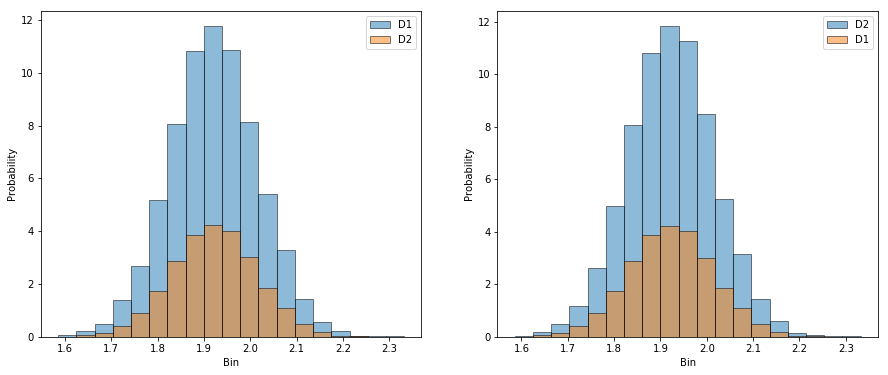

In [9]:
dp_var, ks_var, ws_var = dv.aggtest(ag.dp_var, 'Usage', repeatcount, numbins=20, debug=False)

### Comparing fD1 and fD2 without bounding

Length of D1:  10000  Length of D2:  9999
Mean fD1:  10000.045819315685  Stdev fD1:  5.280400266597634  Mean fD2:  9998.913416666743  Stdev fD2:  5.381320406660306

KS 2-sample Test Result:  Ks_2sampResult(statistic=0.09160000000000001, pvalue=5.443764204731642e-37) 

Wasserstein Distance Test:  0.0012453653001820832 

DP Predicate Test: True 



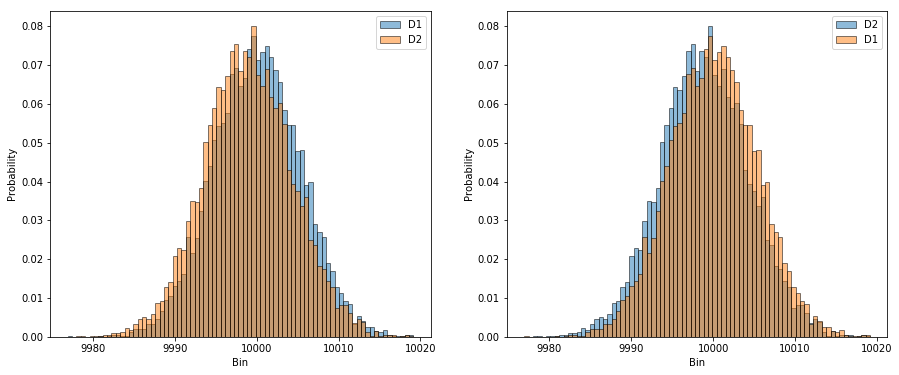

(True,
 Ks_2sampResult(statistic=0.09160000000000001, pvalue=5.443764204731642e-37),
 0.0012453653001820832)

In [10]:
dv.aggtest(ag.dp_count, 'UserId', repeatcount, numbins, debug = False, bound=False)

### Plotting KS Test Results by different aggregate functions

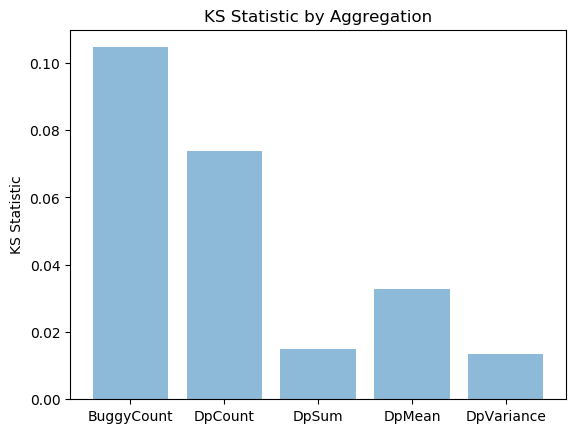

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('BuggyCount', 'DpCount', 'DpSum', 'DpMean', 'DpVariance')
y_pos = np.arange(len(objects))

ks_stat = [ks_buggy[0],
          ks_count[0],
          ks_sum[0],
          ks_mean[0],
          ks_var[0]]

plt.bar(y_pos, ks_stat, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('KS Statistic')
plt.title('KS Statistic by Aggregation')

plt.show()

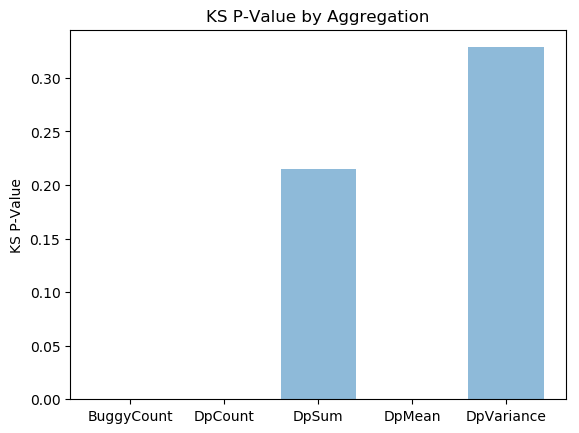

In [12]:
ks_stat = [ks_buggy[1],
          ks_count[1],
          ks_sum[1],
          ks_mean[1],
          ks_var[1]]

plt.bar(y_pos, ks_stat, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('KS P-Value')
plt.title('KS P-Value by Aggregation')

plt.show()

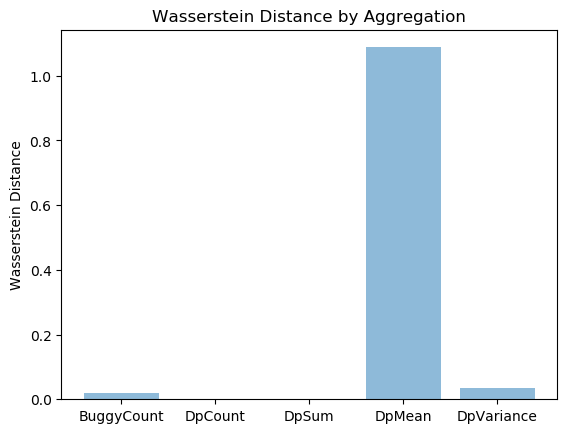

In [13]:
ws_stat = [ws_buggy,
          ws_count,
          ws_sum,
          ws_mean,
          ws_var]

plt.bar(y_pos, ws_stat, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Wasserstein Distance')
plt.title('Wasserstein Distance by Aggregation')

plt.show()